# Importing All Necessary Libraries

Libraries for data manipulation, visualization, and machine learning are imported.
Training and testing datasets are loaded into pandas DataFrames (train and test).

In [1]:
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
nltk.download('wordnet')
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from nltk.corpus import  stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading Datasets

In [2]:
train=pd.read_csv('dataset/train.csv')
train.head(10)

,id,comment_text,toxic,highly_toxic,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
test=pd.read_csv('dataset/test.csv')
test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


# Checking Null Values
Null values in the training dataset are checked.
A heatmap is created to visualize the distribution of null values.

id              0
comment_text    0
toxic           0
highly_toxic    0
rude            0
threat          0
abuse           0
loathe          0
dtype: int64
Axes(0.125,0.11;0.62x0.77)


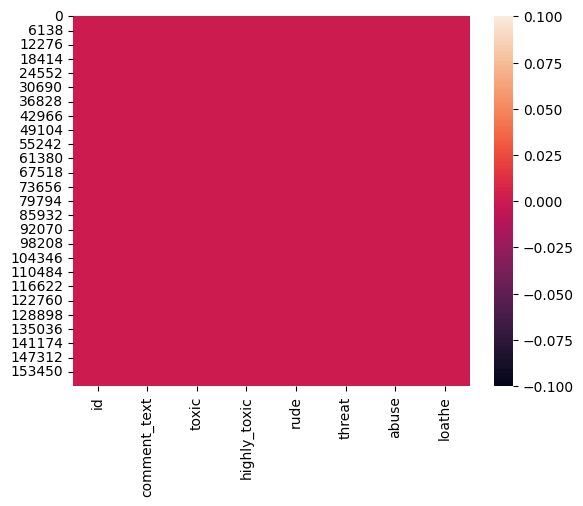

In [4]:
print(train.isnull().sum())
print(sns.heatmap(train.isnull()))

# Correlation Matrix and Heatmap
Numeric columns in the training dataset are selected.
A correlation matrix is computed for these numeric columns.
A heatmap is created to visualize the correlation between features.

                 toxic  highly_toxic      rude    threat     abuse    loathe
toxic         1.000000      0.308619  0.676515  0.157058  0.647518  0.266009
highly_toxic  0.308619      1.000000  0.403014  0.123601  0.375807  0.201600
rude          0.676515      0.403014  1.000000  0.141179  0.741272  0.286867
threat        0.157058      0.123601  0.141179  1.000000  0.150022  0.115128
abuse         0.647518      0.375807  0.741272  0.150022  1.000000  0.337736
loathe        0.266009      0.201600  0.286867  0.115128  0.337736  1.000000


<Axes: >

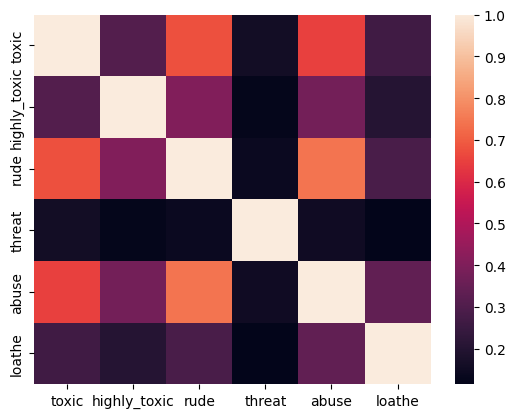

In [5]:
# Exclude non-numeric columns
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train[numeric_columns].corr()

# Print correlation matrix
print(correlation_matrix)

# Plot heatmap
sns.heatmap(correlation_matrix)

# Skewness for each feature
The code you provided is focused on analyzing the skewness of numeric features in the dataset and exploring the distribution of different toxicity classes

numeric_columns is a list of column names containing numeric data types (float64 and int64).

skewness is a Pandas Series containing the skewness values for each numeric feature in the dataset.

The skewness indicates the degree of asymmetry in the distribution of each feature. Positive skewness means a right-skewed distribution, while negative skewness means a left-skewed distribution.

In [6]:
# Exclude non-numeric columns
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
# Calculate skewness for numeric columns
skewness = train[numeric_columns].skew()
# Print skewness for each feature
print(skewness)

toxic            2.745854
highly_toxic     9.851722
rude             3.992817
threat          18.189001
abuse            4.160540
loathe          10.515923
dtype: float64


# Exploring Toxicity Classes

The count plots give insights into the distribution of different toxicity classes in the dataset, providing an overview of the data's imbalance or balance. The visualization helps understand the distribution of toxic and non-toxic comments.

toxic


toxic
Non-toxic    144277
Toxic         15294
Name: count, dtype: int64


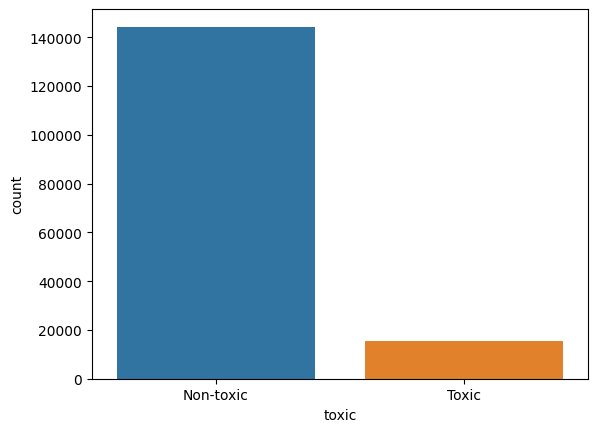

highly_toxic


highly_toxic
Non-toxic    157976
Toxic          1595
Name: count, dtype: int64


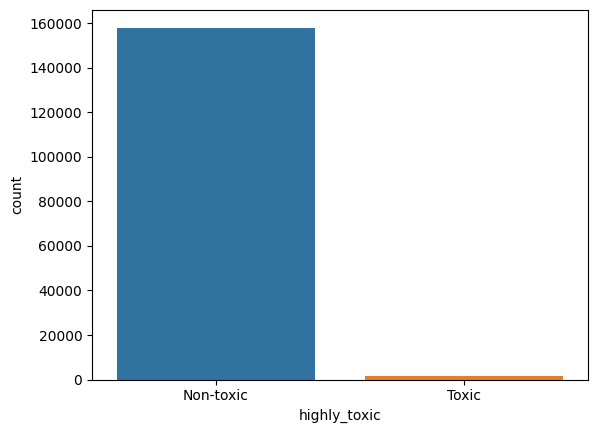

loathe


loathe
Non-toxic    158166
Toxic          1405
Name: count, dtype: int64


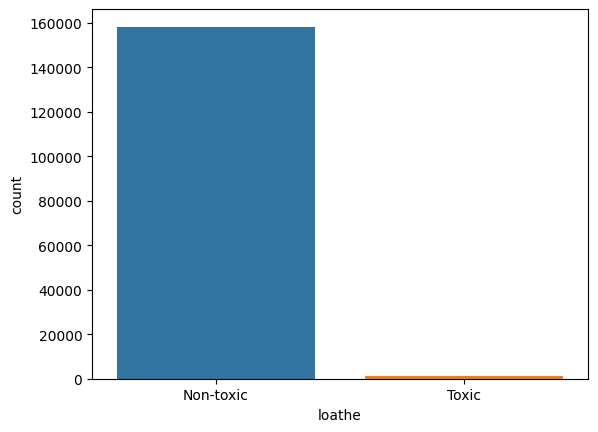

rude


rude
Non-toxic    151122
Toxic          8449
Name: count, dtype: int64


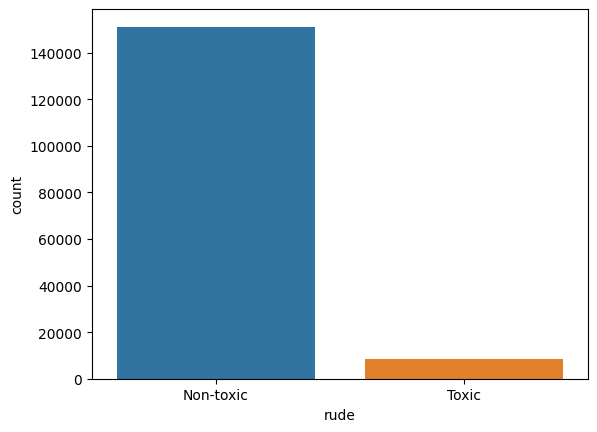

abuse


abuse
Non-toxic    151694
Toxic          7877
Name: count, dtype: int64


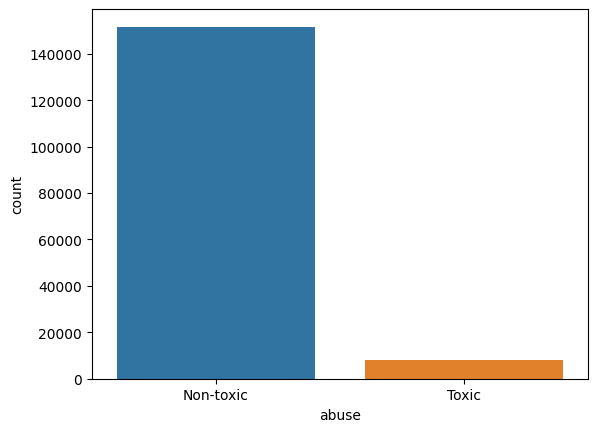

threat


threat
Non-toxic    159093
Toxic           478
Name: count, dtype: int64


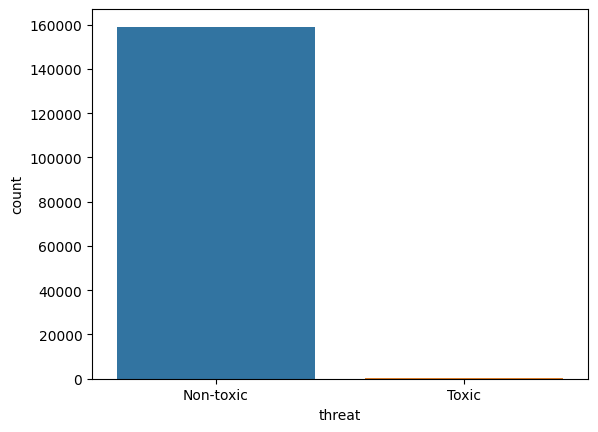

In [7]:
col = ['toxic', 'highly_toxic', 'loathe', 'rude', 'abuse', 'threat']

for i in col:
    print(i)
    print("\n")
    
    # Replace 0 with "Non-toxic" and 1 with "Toxic" in value counts
    value_counts = train[i].replace({0: "Non-toxic", 1: "Toxic"}).value_counts()
    print(value_counts)
    
    # Ensure both classes ("Non-toxic" and "Toxic") are represented in the count plot
    sns.countplot(x=train[i].replace({0: "Non-toxic", 1: "Toxic"}), order=value_counts.index)
    
    plt.show()


# Feature Engineering

A new feature 'length' is created, representing the character length of each comment.

In [8]:
train['length'] = train['comment_text'].str.len()
train.head(10)

,id,comment_text,toxic,highly_toxic,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70


# Data Processing
Text in the 'comment_text' column is converted to lowercase.
Various cleaning steps are applied, such as handling emails, URLs, and removing stop words.

In [9]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()
# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')
# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

# Data Cleaning

In [10]:
train['clean_length'] = train.comment_text.str.len()
train.head(10)

,id,comment_text,toxic,highly_toxic,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,181
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,101
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47
5,00025465d4725e87,"congratulation well, use tool well. · talk",0,0,0,0,0,0,65,42
6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0,44,27
7,00031b1e95af7921,vandalism matt shirvington article reverted. p...,0,0,0,0,0,0,115,66
8,00037261f536c51d,"sorry word 'nonsense' offensive you. anyway, i...",0,0,0,0,0,0,472,316
9,00040093b2687caa,alignment subject contrary dulithgow,0,0,0,0,0,0,70,36


In [11]:
# Total length removal
print ('Origian Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origian Length 62893130
Clean Length 43155915


# Label Distribution Over Comments

The distribution of different toxicity labels is analyzed.
A pie chart is created to visualize the label distribution.

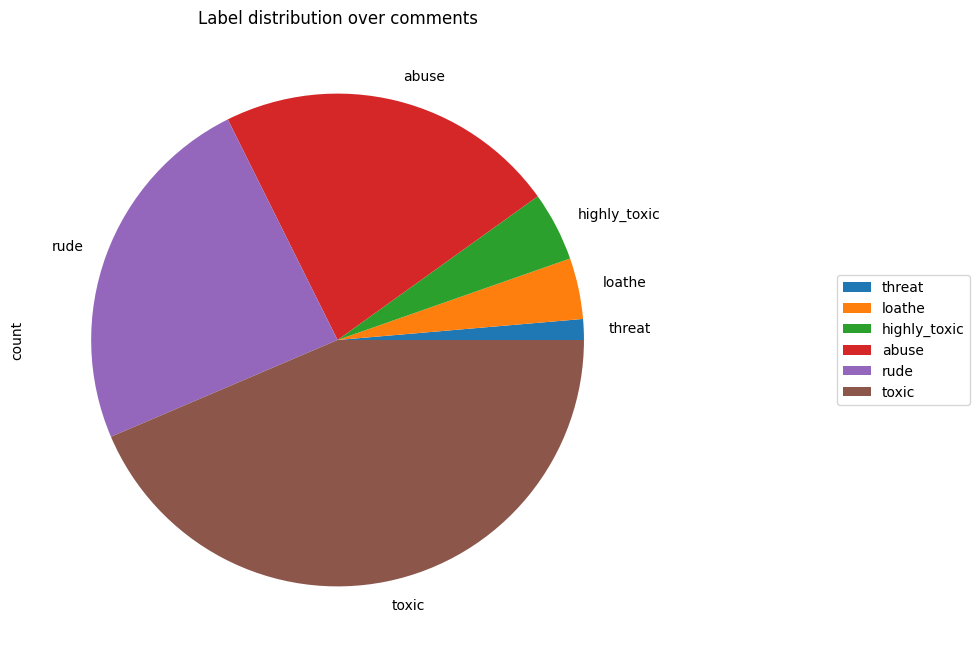

In [12]:
cols_target = ['toxic','highly_toxic','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(8, 8))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

# Data Cleaning and Label Modification:
The 'toxic' label is modified to represent binary classification (0 for non-toxic, 1 for toxic).

In [13]:
target_data = train[cols_target]
train['toxic'] =train[cols_target].sum(axis =1)
print(train['toxic'].value_counts())
train['toxic'] = train['toxic'] > 0 
train['toxic'] = train['toxic'].astype(int)
print(train['toxic'].value_counts())

toxic
0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: count, dtype: int64
toxic
0    143346
1     16225
Name: count, dtype: int64


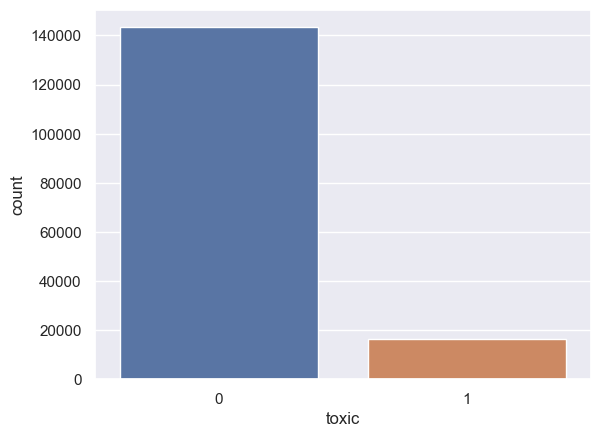

In [14]:
sns.set()
sns.countplot(x="toxic" , data = train)
plt.show()

# Text Vectorization using TF-IDF:
The 'comment_text' is converted into numerical vectors using TF-IDF vectorization.
Features (x) and target (y) are prepared for machine learning.

In [15]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [16]:
y=train['toxic']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)
y_train.shape,y_test.shape

((111699,), (47872,))

# Machine Learning Model: Logistic Regression
A Logistic Regression model is trained on the training data (x_train and y_train).

In [17]:
LG = LogisticRegression(C=1, max_iter = 3000)
LG.fit(x_train, y_train)

LogisticRegression(C=1, max_iter=3000)

# Model Training

Model is train on training dataset

In [18]:
y_pred_train = LG.predict(x_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print('Training accuracy is {} %'.format(training_accuracy*100))

Training accuracy is 95.93819103125364 %


# Model Testing

Model is tested on testing dataset

In [19]:
y_pred_test = LG.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print('Test accuracy is {} %'.format(test_accuracy*100))

Test accuracy is 95.5276570855615 %


# False Positive and False Negative Analysis

A confusion matrix is created using the predicted and actual labels of the testing dataset.
False positives and false negatives are extracted from the confusion matrix.
A heatmap visualizes the confusion matrix.

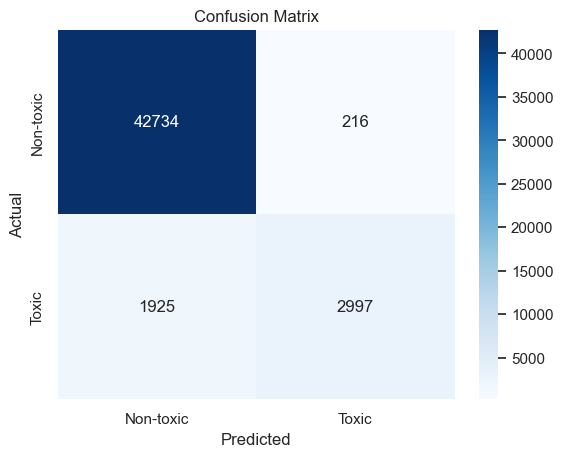

In [20]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
# Visualize confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-toxic', 'Toxic'], yticklabels=['Non-toxic', 'Toxic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


False Positives: 216
False Negatives: 1925


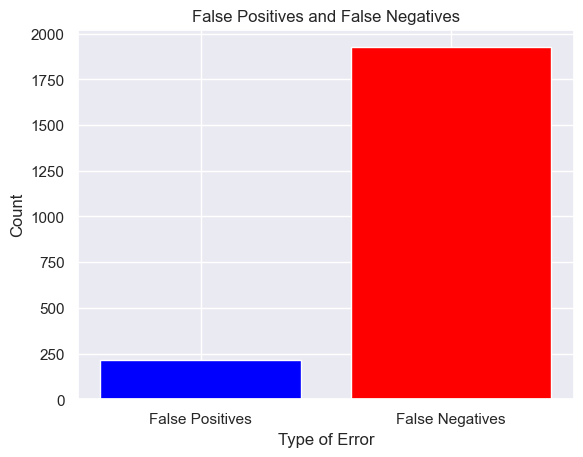

In [21]:
# Extract values for false positives and false negatives
false_positive = conf_matrix[0, 1]  # Non-toxic comments predicted as toxic
false_negative = conf_matrix[1, 0]  # Toxic comments predicted as non-toxic
print('\nFalse Positives:', false_positive)
print('False Negatives:', false_negative)

# Visualize false positives and false negatives using bar graphs
labels = ['False Positives', 'False Negatives']
values = [false_positive, false_negative]

plt.bar(labels, values, color=['blue', 'red'])
plt.xlabel('Type of Error')
plt.ylabel('Count')
plt.title('False Positives and False Negatives')
plt.show()

# Performance Metrics

A detailed classification report is printed, including precision, recall, and F1-score for each class.

In [22]:
# Print classification report
class_report = classification_report(y_test, y_pred_test)
print('Classification Report:\n')
print(class_report)

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



# Regarding Your Questions:
### Confusion Matrix Dataset:

The confusion matrix is based on the testing dataset (x_test and y_test).
It compares the actual labels (y_test) with the predicted labels (y_pred_test).

### Percentage of Results and Reference:

The percentage of accuracy is calculated using the accuracy_score from scikit-learn.
The reference is the actual labels in the testing dataset (y_test).
Accuracy is the ratio of correctly predicted instances to the total instances in the testing dataset.

### Precision:

Formula: Precision = TP / (TP + FP)

Precision is the number of true positive predictions divided by the total number of predicted positives. It measures the accuracy of positive predictions made by the model. A high precision indicates a low false positive rate.

### Recall (Sensitivity or True Positive Rate):

Formula: Recall = TP / (TP + FN)

Recall is the number of true positive predictions divided by the total number of actual positives. It measures the model's ability to capture all the positive instances. A high recall indicates a low false negative rate.


### F1 Score:

Formula: F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall. F1 score is particularly useful when the class distribution is imbalanced.

### Support:

Support is the number of actual occurrences of the class in the specified dataset. It represents the number of true instances for each class. It helps to understand the distribution of classes in the dataset.